## Handwritten Digit Recognition

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-09-30 04:49:36.536623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


### Dataset

In [3]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

In [4]:
print('The shape of X is:', (X.shape))
print('The shape of y is:', (y.shape))

print('The shape of X[0] is:', (X[0].shape))
print('Value of y[0] is:', y[0])

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)
The shape of X[0] is: (400,)
Value of y[0] is: [0]


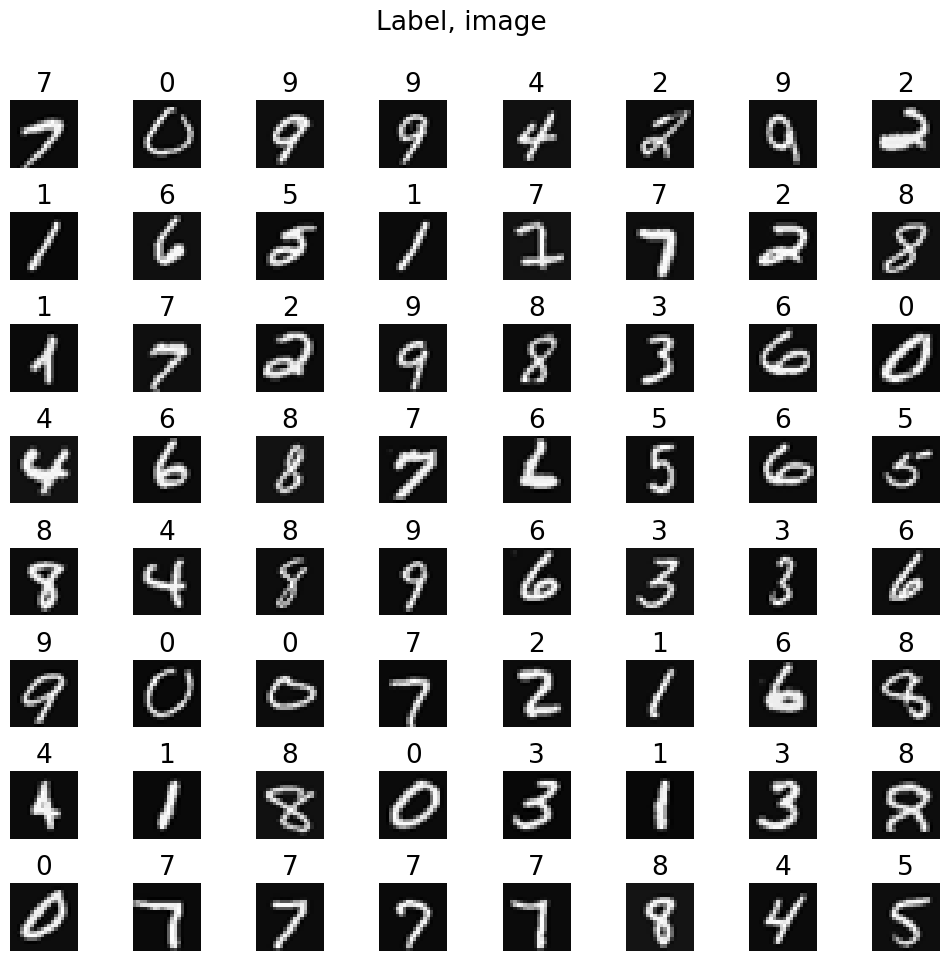

In [5]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(rect=[0, 0.0, 1, 0.91])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index, 0], fontsize=19)
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=19)

### Model

In [6]:
tf.random.set_seed(1234)

model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3'),

    ], name="my_model"
)

2023-09-30 04:49:41.161827: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [8]:
[layer1, layer2, layer3] = model.layers

W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [9]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X, y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.5313
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.6569
Epoch 3/40
157/157 [==============================] - 0s 3ms/step - loss: 0.4714
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3801
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3232
Epoch 6/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2843
Epoch 7/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2562
Epoch 8/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2325
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2201
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1988
Epoch 11/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1882
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1770
Epoch 13/40
157/157 [====

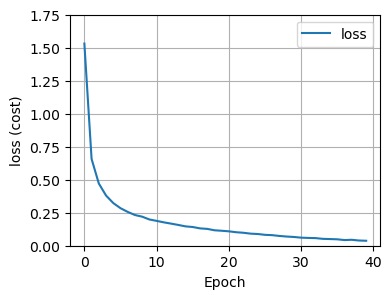

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 1.75])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

### Prediction

/tmp/ipykernel_3861/2281255842.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(rect=[0, 0.0, 1, 0.91])


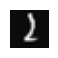

In [11]:
X[1015]                 # This is an image of 2
fig, ax = plt.subplots(1, 1, figsize=(0.5, 0.5))
fig.tight_layout(rect=[0, 0.0, 1, 0.91])
X_reshaped = X[1015].reshape((20, 20)).T
ax.set_axis_off()
ax.imshow(X_reshaped, cmap='gray')
plt.show()

In [12]:
prediction = model.predict(X[1015].reshape(1, 400))          # prediction

print(f"Prediction: \n{prediction}")
print(f"Index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 72ms/step
Prediction: 
[[-17.128983     5.0210805    7.586511     0.86992115  -4.6318264
   -9.16182     -2.3770142    2.1825457   -1.4721926   -6.808055  ]]
Index: 2


In [13]:
prediction = model.predict(X)
yhat = np.argmax(prediction, axis=1)
doo = yhat != y[:, 0]
idxs = np.where(yhat != y[:, 0])[0]
print( f"{len(idxs)} errors out of {len(X)} images")
    

 22/157 [===>..........................] - ETA: 0s

157/157 [==============================] - 1s 5ms/step
33 errors out of 5000 images
